In [15]:
import importlib
import actor_critic
importlib.reload(actor_critic)
from actor_critic import ActorCritic

In [16]:
ac = ActorCritic(
                 environ_name="CartPole-v0",
                 n_envs=10,
                 max_episode_steps=None,
                 mlp_dims=(20,20),
                 entropy_coef=0.01,
                 reward_scale=1.,
                 lr_actor=0.001,
                 lr_critic=0.001,
                )

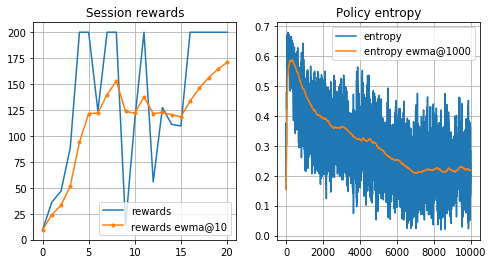


100%|██████████| 10001/10001 [04:00<00:00, 41.60it/s]

CPU times: user 4min 3s, sys: 14.8 s, total: 4min 18s
Wall time: 4min


([9.333333333333334,
  36.0,
  46.666666666666664,
  88.33333333333333,
  200.0,
  200.0,
  124.0,
  200.0,
  200.0,
  13.666666666666666,
  115.66666666666667,
  200.0,
  55.666666666666664,
  127.33333333333333,
  111.0,
  109.66666666666667,
  200.0,
  200.0,
  200.0,
  200.0,
  200.0],
 [0.15441047,
  0.16807649,
  0.18215072,
  0.19743799,
  0.21597521,
  0.24098575,
  0.27075806,
  0.29686552,
  0.3182586,
  0.27228063,
  0.20176332,
  0.20464885,
  0.22660354,
  0.23207386,
  0.26298928,
  0.2996745,
  0.33952165,
  0.3706064,
  0.37709588,
  0.37544265,
  0.33323634,
  0.3135423,
  0.30061024,
  0.32367283,
  0.36761576,
  0.41786322,
  0.45455542,
  0.4796298,
  0.4355723,
  0.45193434,
  0.4702221,
  0.45230117,
  0.4230818,
  0.48737177,
  0.498067,
  0.5462025,
  0.59893525,
  0.5681228,
  0.58550584,
  0.5724648,
  0.6018895,
  0.62479365,
  0.6515058,
  0.6253831,
  0.6265143,
  0.6327908,
  0.645315,
  0.60696214,
  0.63679683,
  0.6373919,
  0.60309416,
  0.6127227,
  0

In [18]:
%%time
ac.run(n_iters=10001, gamma=0.99, n_games_per_plot_update=3)

In [ ]:
ac.agent.model.summary()